In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG','BEI.DE']
tickers_data = pd.DataFrame()
startdate = datetime(2013,7,1)
enddate = datetime(2023,7,1)
for i in tickers:
    tickers_data[i] = pdr.get_data_yahoo(i,start = startdate, end = enddate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
tickers_data.head()

,PG,BEI.DE
Date,,
2013-07-01,58.361397,62.645233
2013-07-02,58.675583,62.913269
2013-07-03,58.772820,62.349472
2013-07-05,58.600761,62.358715
2013-07-08,58.914936,62.608261


## Normalization to 100:
###    (Pt/P0)*100

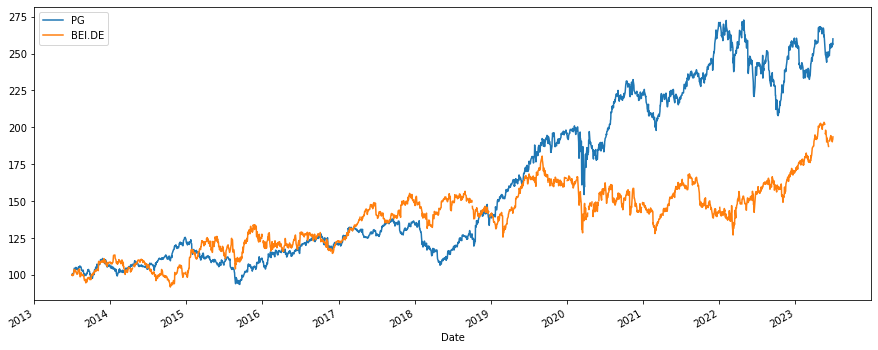

In [4]:
((tickers_data/tickers_data.iloc[0])*100).plot(figsize=(15,6))
plt.show()

## Log Return:

Logaritmic rate of return is used when you make calculations about a singel asset over time.

In [5]:
sec_return = np.log(tickers_data/tickers_data.shift(1))
sec_return.head()

,PG,BEI.DE
Date,,
2013-07-01,NaN,NaN
2013-07-02,0.005369,0.004270
2013-07-03,0.001656,-0.009002
2013-07-05,-0.002932,0.000148
2013-07-08,0.005347,0.003994


## Calculating the Volatility of the stock:

i.e. the measure of dispersion of a set of data points around the mean.

In [6]:
for i in sec_return:
    print(i,"Annual Mean: ",sec_return[i].mean() * 250)
    print(i,"Annual SD: ",sec_return[i].std() * 250 ** 0.5)

PG Annual Mean:  0.09490602986893677
PG Annual SD:  0.18086243946080932
BEI.DE Annual Mean:  0.06736184852510516
BEI.DE Annual SD:  0.1982539727469606


In [7]:
type(tickers)

list

In [8]:
sec_return[tickers].mean() * 250

PG        0.094906
BEI.DE    0.067362
dtype: float64

In [9]:
sec_return[tickers].std() * 250 ** 0.5

PG        0.180862
BEI.DE    0.198254
dtype: float64